**Rationale** In this assignment, you will practice using logit models to analyze data with binary discrete outcomes.

You will be using the following [datasets](https://drive.google.com/drive/folders/1-oR65kkGk7TIzBtRGXVWhkeU1q7yIc-x?usp=sharing). These are the same datasets from Assignment 4.

1. Orange telecom churn
1. Rent the runway

In [1]:
import os, numpy as np, pandas, matplotlib.pyplot as plt
from statsmodels.formula import api as smf
##from google.colab import drive
##drive.mount('drive')

In [2]:
fpath = './' # change this to your data folder
os.listdir(fpath)

['A8_F2021_Logit.ipynb',
 'renttherunway_final_data.json',
 '11_Regression_Pt_2_multiple_regression.ipynb',
 '.ipynb_checkpoints',
 'telecom_churn.csv',
 '10_Regression_Pt_1.ipynb']

# Problem 1 (5 Points)

Use the rent the runway dataset.

Preprocessing:

1. Replace missing values for "rented_for" column with "unspecified".
1. Replace missing values for "body_type" column with "unspecified".
1. Create a column "fit1" which is 0 everywhere except 1's where the value in the "fit" column == "fit", i.e. tranform the fit column to 0's and 1's, 0 where an item didn't fit and 1's where it did.

Run the following regression specified in the problem below.

In [57]:
# read in the dataset, call it rent
# take a look at A4 for how to read in the json file
rent_df = pandas.read_json('renttherunway_final_data.json', lines=True)
rent_df.head(5)

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


In [58]:
# replace spaces in column names with underscores
# see last 2 assignments if you don't know how to do this
rent_columns = rent_df.columns.str.replace(' ', '_')
rent_df.columns = rent_columns 

In [59]:
# take a preview of the rent dataframe, refresh yourself of what's contained in the data
rent_df.head(5)

,fit,user_id,bust_size,item_id,weight,rating,rented_for,review_text,body_type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


In [60]:
# create the 'fit1' column: 0's where item fits, 1 where it didn't
# if you forgot, go back to A4 to refresh your memory of how to do this

rent_df.loc[rent_df['fit'] == 'fit', 'fit']= 0
rent_df.loc[rent_df['fit'] != 0, 'fit'] = 1



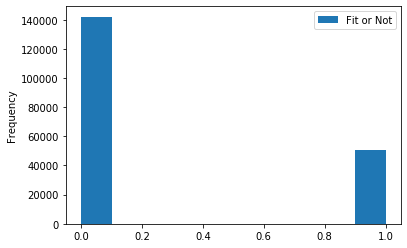

In [61]:
# create a histogram for the fit1 column
# get a sense of the proportion of items that fit
rent_df['fit'].plot(kind='hist', label= 'Fit or Not')
plt.legend()
plt.show()

In [62]:
# Replace missing values of column rented for with "unspecified" using 
# rent.rented_for.fillna('unspecified', inplace = True)
rent_df.rented_for.fillna('unspecified', inplace = True)


In [63]:
# check the unique values in rented_for, 
# make sure there are no missing values NaN (i.e. you did the fillna step correctly)
rent_df['rented_for'].unique()

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work', 'unspecified', 'party: cocktail'], dtype=object)

In [64]:
# replace missing values in body type column with "unspecified"
rent_df.body_type.fillna('unspecified', inplace = True)


In [65]:
# check the unique values in body_type, 
# make sure there are no missing values NaN (i.e. you did the fillna step correctly)
rent_df['body_type'].unique()
rent_df['fit'] = pandas.to_numeric(rent_df['fit'])


Run the following regression

$$
Logit(fit1) = \beta_0 + \sum_{Occassion\ne everyday}\beta_{Occassion}+ \sum_{BodyType\ne petite}\beta_{BodyType} + e
$$

e.g. use occassion (rented_for) and body type as explanatory variables, but explciitly use the 'everyday' category as the reference group for occassion and the 'petite' category as the reference group for body type. If you don't know what this means, review the Module 6 notes on categorical variables and dummy coding.

In [66]:
## making dummy variables for rented_for and body_type:

rent_df['dum_rented_for'] = 0
rent_df['dum_body_type'] = 0
rent_df.loc[rent_df['rented_for'] == 'everyday', 'dum_rented_for'] = 1
rent_df.loc[rent_df['body_type'] == 'petite', 'dum_body_type'] = 1
rent_df['dum_body_type'] = pandas.to_numeric(rent_df['dum_body_type'])
rent_df['dum_rented_for'] = pandas.to_numeric(rent_df['dum_rented_for'])
## dummy variable body type


rent_df.head(5)

,fit,user_id,bust_size,item_id,weight,rating,rented_for,review_text,body_type,review_summary,category,height,size,age,review_date,dum_rented_for,dum_body_type
0,0,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016",0,0
1,0,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013",0,0
2,0,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,unspecified,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015",0,0
3,0,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014",0,0
4,0,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016",0,0


In [71]:
# estimate the logit model
# Recall from Module 6 notes, you can specify a reference group using C(varname, Treatment(reference = "reference group")),
# where "reference group" here would be "everyday" if the varname is rented_for

## dummy variables -- see above


formula = 'fit ~ rented_for + body_type + C(dum_rented_for, Treatment(reference=1)) + C(dum_body_type, Treatment(reference=1))'
res = smf.logit(formula,  data = rent_df).fit()

         Current function value: 0.573855
         Iterations: 35


/home/bob/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [76]:
# print the summary stats for the logit model

summary = res.summary()
pvalues = res.pvalues
print(pvalues)
summary

Intercept                                                  NaN
rented_for[T.everyday]                            9.999992e-01
rented_for[T.formal affair]                       3.320047e-26
rented_for[T.other]                               1.191069e-04
rented_for[T.party]                               1.232330e-02
rented_for[T.party: cocktail]                     9.922331e-01
rented_for[T.unspecified]                         2.211469e-01
rented_for[T.vacation]                            7.126057e-01
rented_for[T.wedding]                             4.202407e-10
rented_for[T.work]                                1.277367e-01
body_type[T.athletic]                             2.767236e-05
body_type[T.full bust]                            6.371536e-01
body_type[T.hourglass]                            4.405509e-04
body_type[T.pear]                                 5.095231e-02
body_type[T.petite]                               9.999987e-01
body_type[T.straight & narrow]                    1.024

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    fit   No. Observations:               192544
Model:                          Logit   Df Residuals:                   192527
Method:                           MLE   Df Model:                           16
Date:                Fri, 12 Nov 2021   Pseudo R-squ.:                0.002600
Time:                        17:01:42   Log-Likelihood:            -1.1049e+05
converged:                      False   LL-Null:                   -1.1078e+05
Covariance Type:            nonrobust   LLR p-value:                2.720e-112
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         -0.4052        nan        nan        nan         nan         nan
rented_for[T.everyday]                            -0.1503   1.49e+05  -1.01e-06      1.000   -2.92e+05    2.92e+05
rented_for[T.formal affair]                       -0.2996      0.028    -10.590      0.000      -0.355      -0.244
rented_for[T.other]                               -0.1214      0.032     -3.848      0.000      -0.183      -0.060
rented_for[T.party]                               -0.0709      0.028     -2.503      0.012      -0.126      -0.015
rented_for[T.party: cocktail]                    -13.5419   1391.123     -0.010      0.992   -2740.092    2713.009
rented_for[T.unspecified]                         -1.2902      1.055     -1.223      0.221      -3.357       0.777
rented_for[T.vacation]                            -0.0159      0.043     -0.368      0.713      -0.101       0.069
rented_for[T.wedding]                             -0.1713      0.027     -6.246      0.000      -0.225      -0.118
rented_for[T.work]                                -0.0480      0.031     -1.523      0.128      -0.110       0.014
body_type[T.athletic]                             -0.1409      0.034     -4.192      0.000      -0.207      -0.075
body_type[T.full bust]                            -0.0173      0.037     -0.472      0.637      -0.089       0.054
body_type[T.hourglass]                            -0.1167      0.033     -3.515      0.000      -0.182      -0.052
body_type[T.pear]                                 -0.0687      0.035     -1.952      0.051      -0.138       0.000
body_type[T.petite]                               -0.2737   1.71e+05   -1.6e-06      1.000   -3.36e+05    3.36e+05
body_type[T.straight & narrow]                    -0.1632      0.037     -4.412      0.000      -0.236      -0.091
body_type[T.unspecified]                          -0.1443      0.037     -3.900      0.000      -0.217      -0.072
C(dum_rented_for, Treatment(reference=1))[T.0]    -0.2549   1.49e+05  -1.71e-06      1.000   -2.92e+05    2.92e+05
C(dum_body_type, Treatment(reference=1))[T.0]     -0.1314   1.71e+05  -7.67e-07      1.000   -3.36e+05    3.36e+05
==================================================================================================================
"""

**Answer these questions**

Based on the logit results table above, answer the following:

1. Which *body types*, if any, have statistically *better* likelihood of fitting compared to those with "petite" body types? List them below.

**ANSWER: The body types that have a statistically better likelihood of fitting compared to those with "petite" body types are those body types with a (i) a negative coefficient (more likely to result in a 'fit', i.e. fit==0) and (ii) a p value that is statistically significant (p value < .05). The body types are: straight & narrow; athletic; unspecified; and hourglass.**
    

1. Which *body types*, if any, have statistically *worse* likelihood of fitting compared to those with "petite" body types? List them below.

**ANSWER: the body types that have a statistically lower likelihood of fitting compared to those with the "petite" body type would be those that have (i) coefficient that is positive i.e. less likely to result in garment fitting (i.e, non-fit, so 'fit' == 1) and (ii) which are stasistically significant, i.e., have a p value < .05. No body types meet those conditions.

1. Which *occassions*, if any, have statistically *better* likelihood of fitting compared to "everyday" occassion? List them below.

**ANSWER:  Those occassions that have a better likelihood of fitting (i.e. a fit of zero) are those with a coefficient that is negative and which are statistically signficant (p < .05).  The only category of "rented for" meeting both of those conditions is formal affair, other, party, wedding.

1. Which *occassions*, if any, have statistically *worse* likelihood of fitting compared to "everyday" occassion? List them below.

**ANSWER:  Those occasions that have a worse likelihood of fitting (i.e. a fit of 1, and doesn't fit) are those with a coefficient that is positive and which are statistically significant (p < .05).  No occasions met those conditions.**

1. Why can't you directly interpret the quantity of these coefficients in an intuitive manner (can only interpret their signs)? What do you need to do to interpret the independent variables' impact on the *probability* of fit?

**ANSWER: You can't directly interpret the quantity of the coefficients because the model isn't linear, and what the coefficient means depends on where you fall on the model's curve.  In order to interpret the impact of the variables on the probability of fit, one must generate a "marginal effects table" to show the average marginal effect across all observations using get_margeff() method built into statsmodels.**


*Note that statistically better/worse requires you to interpret the p-values for statistical significance, i.e. check where there is enough evidence to reject the null that there is no difference (coefficient = 0), in addition to the sign of the coefficient.

In [78]:
# calculate the marginal effects table for the logit model
mfx = res.get_margeff()
marginal_summary = mfx.summary()


# print the marginal effects summary table below

marginal_summary

/home/bob/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_margins.py:343: RuntimeWarning: invalid value encountered in sqrt
  return cov_me, np.sqrt(np.diag(cov_me))


<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:                    fit
Method:                          dydx
At:                           overall
==================================================================================================================
                                                    dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
rented_for[T.everyday]                            -0.0290   2.87e+04  -1.01e-06      1.000   -5.63e+04    5.63e+04
rented_for[T.formal affair]                       -0.0578      0.005    -10.597      0.000      -0.068      -0.047
rented_for[T.other]                               -0.0234      0.006     -3.848      0.000      -0.035      -0.011
rented_for[T.party]                               -0.0137      0.005     -2.503      0.012      -0.024      -0.003
rented_for[T.party: cocktail]                     -2.6119    268.309     -0.010      0.992    -528.488     523.264
rented_for[T.unspecified]                         -0.2488      0.203     -1.223      0.221      -0.647       0.150
rented_for[T.vacation]                            -0.0031      0.008     -0.368      0.713      -0.019       0.013
rented_for[T.wedding]                             -0.0330      0.005     -6.248      0.000      -0.043      -0.023
rented_for[T.work]                                -0.0093      0.006     -1.523      0.128      -0.021       0.003
body_type[T.athletic]                             -0.0272      0.006     -4.192      0.000      -0.040      -0.014
body_type[T.full bust]                            -0.0033      0.007     -0.472      0.637      -0.017       0.011
body_type[T.hourglass]                            -0.0225      0.006     -3.515      0.000      -0.035      -0.010
body_type[T.pear]                                 -0.0132      0.007     -1.952      0.051      -0.027    5.49e-05
body_type[T.petite]                               -0.0528    3.3e+04   -1.6e-06      1.000   -6.48e+04    6.48e+04
body_type[T.straight & narrow]                    -0.0315      0.007     -4.412      0.000      -0.045      -0.017
body_type[T.unspecified]                          -0.0278      0.007     -3.900      0.000      -0.042      -0.014
C(dum_rented_for, Treatment(reference=1))[T.0]    -0.0492   2.87e+04  -1.71e-06      1.000   -5.63e+04    5.63e+04
C(dum_body_type, Treatment(reference=1))[T.0]     -0.0254    3.3e+04  -7.67e-07      1.000   -6.48e+04    6.48e+04
==================================================================================================================
"""

**Answer these questions**

1. Which occassion has the highest, statistically significant, average marginal effect on fit? Interpret the marginal effect.
    
**Formal Affair.  The dy/dx is -.0578 which means that the rental of a garment for the occasion of a formal affair increases the probability that fit == 0 by .0578, i.e. an increase in probability, on average, of .0578 that the garment fits (i.e. that 'fit' == 0).  And a statistically significant P value of -.047, i.e. p value < .05.** 

1. Which body type has the lowest, statistically signifiant, average marginal effect on fit? Interpret the marginal effect.
    
**The body type "full bust" has the lowest statistically significiant effect on fit. the dy/dx is -.0033 (and P value of .011 (i.e. p value < .05). The marginal effect of .0033 means that the body type "full bust" increases the chance of fit, on average, by .0033, i.e. the chance that 'fit' == 0.**


# Problem 2 (5+1 points)

Use the orange telecom churn data to estimate a logit model of customer churn. Recall here that Churn means that the customer left their contract for the cell phone plan. These plans are from the 2010's when phone plans had potentially different rates for days and nights.

1. Convert the "Churn" variable to integer type, e.g. `df.Churn = df.Churn.astype(int)`
1. List at least 3 variables that you think might be predictive of churn. Give a brief explanation for each variable's relationship with potential churn. You may want to avoid using categorical variables with **too many** unique values, such as area code, as it makes the model difficult to interpret and may take too long to estimate / may not run. You may also want to create composite variables, a variable derived from other variables in the dataframe, such as average rate paid (charge/ minutes). You may also want to include log transformations or quadratic components if you believe there may be nonlinearities such as diminishing returns, for example. (up to 1 bonus point for creativity here)
1. Specify and estimate a model of churn.
1. Obtain the marginal effects for the model you've estimated. Interpret these results.
1. Given your model results, what is a suggestion to management about potential interventions to deter churn?

In [79]:
# read in the dataset
!ls

10_Regression_Pt_1.ipynb		      renttherunway_final_data.json
11_Regression_Pt_2_multiple_regression.ipynb  telecom_churn.csv
A8_F2021_Logit.ipynb


In [136]:
# replace column name spaces with underscores
orange_df = pandas.read_csv('telecom_churn.csv')
orange_df_columns = orange_df.columns.str.replace(' ', '_')
orange_df.columns = orange_df_columns

In [137]:
# preview the dataset to get a sense of its contents
orange_df.head(5)

,State,Account_length,Area_code,International_plan,Voice_mail_plan,Number_vmail_messages,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,Total_eve_calls,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Customer_service_calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [141]:
## Create new columns

orange_df['Total_domestic_charge'] = orange_df['Total_day_charge'] + orange_df['Total_eve_charge'] + orange_df['Total_night_charge']
orange_df['ln_total_domestic_charge'] = np.log(orange_df['Total_domestic_charge'])
orange_df['sq_total_domestic_charge'] = orange_df['Total_domestic_charge'] * orange_df['Total_domestic_charge']
orange_df['dollars_per_minute'] = (orange_df['Total_day_minutes'] + orange_df['Total_eve_minutes'] + orange_df['Total_night_minutes'])/orange_df['Total_domestic_charge']
orange_df['churn_bin'] = 0
orange_df.loc[orange_df['Churn'] == True, 'churn_bin'] = 1
new_df = orange_df.astype({'churn_bin': int})
orange_df = new_df

In [142]:
orange_df['churn_bin'].unique()

array([0, 1])

In [143]:
orange_df

,State,Account_length,Area_code,International_plan,Voice_mail_plan,Number_vmail_messages,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,...,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Customer_service_calls,Churn,Total_domestic_charge,ln_total_domestic_charge,sq_total_domestic_charge,dollars_per_minute,churn_bin
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,10.0,3,2.70,1,False,72.86,4.288540,5308.5796,9.706286,0
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,13.7,3,3.70,1,False,55.54,4.017103,3084.6916,11.010083,0
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,12.2,5,3.29,0,False,59.00,4.077537,3481.0000,8.935593,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,6.6,7,1.78,2,False,65.02,4.174695,4227.6004,8.585051,0
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,10.1,3,2.73,3,False,49.36,3.899140,2436.4096,10.168152,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,...,9.9,6,2.67,2,False,57.43,4.050567,3298.2049,11.332056,0
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,...,9.6,4,2.59,3,False,60.94,4.109890,3713.6836,9.448638,0
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,...,14.1,6,3.81,2,False,63.93,4.157789,4087.0449,10.347255,0
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,...,5.0,10,1.35,2,False,56.18,4.028561,3156.1924,9.124244,0


In [144]:
# Convert column "Churn" to integer type
orange_df.Churn = orange_df.Churn.astype(int)


In [145]:
orange_df

,State,Account_length,Area_code,International_plan,Voice_mail_plan,Number_vmail_messages,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,...,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Customer_service_calls,Churn,Total_domestic_charge,ln_total_domestic_charge,sq_total_domestic_charge,dollars_per_minute,churn_bin
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,10.0,3,2.70,1,0,72.86,4.288540,5308.5796,9.706286,0
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,13.7,3,3.70,1,0,55.54,4.017103,3084.6916,11.010083,0
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,12.2,5,3.29,0,0,59.00,4.077537,3481.0000,8.935593,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,6.6,7,1.78,2,0,65.02,4.174695,4227.6004,8.585051,0
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,10.1,3,2.73,3,0,49.36,3.899140,2436.4096,10.168152,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,...,9.9,6,2.67,2,0,57.43,4.050567,3298.2049,11.332056,0
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,...,9.6,4,2.59,3,0,60.94,4.109890,3713.6836,9.448638,0
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,...,14.1,6,3.81,2,0,63.93,4.157789,4087.0449,10.347255,0
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,...,5.0,10,1.35,2,0,56.18,4.028561,3156.1924,9.124244,0


In [ ]:
# use scratch cells here to explore the dataset (graphically) to come up with variables to include in the model

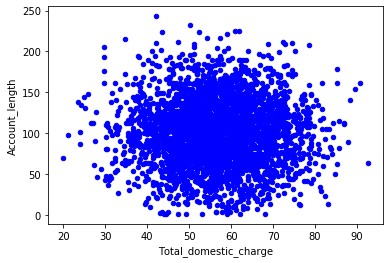

In [127]:
#account length versus total charges
ax1 = orange_df.plot.scatter(x='Total_domestic_charge', y='Account_length', c='Blue')

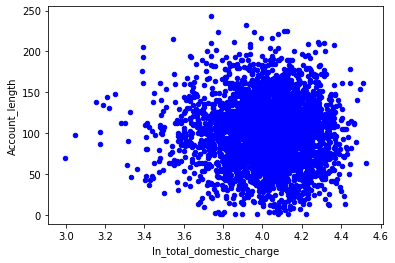

In [157]:
#account length versus squared charges
ax1 = orange_df.plot.scatter(x='ln_total_domestic_charge', y='Account_length', c='Blue')

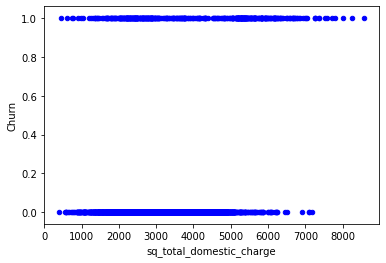

In [133]:
#churn versus total domestic charges
ax1 = orange_df.plot.scatter(x='sq_total_domestic_charge', y='Churn', c='Blue')

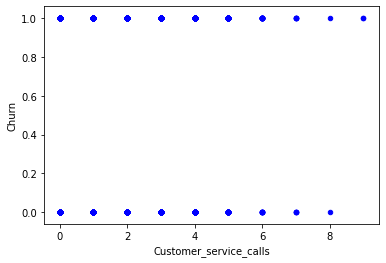

In [134]:
ax1 = orange_df.plot.scatter(x='Customer_service_calls', y='Churn', c='Blue')

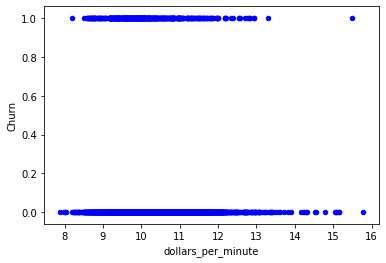

In [146]:
ax1 = orange_df.plot.scatter(x='dollars_per_minute', y='Churn', c='Blue')

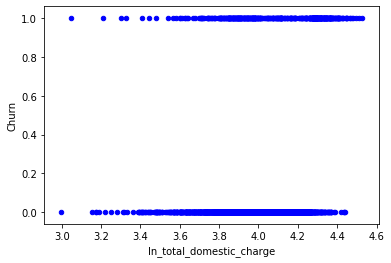

In [147]:
ax1 = orange_df.plot.scatter(x='ln_total_domestic_charge', y='Churn', c='Blue')

**Answer these**

List some (at least 3) explanatory variables from the dataframe, or that you can make using existing variables in the dataframe, that can influence churn. For each, give a brief explanation of the potential relationship, and make a prediction about the direction of the prediction (increase or decrease churn).

1. Total domestic charges (adding up day + eve + night)
    1. potential relationship is that the greater one's charges, the more one will be conscious of the phone expense, and deal-shop among carriers, creating churn.
    1. prediction: increase churn - positive correlation
1. The Square of total domestic charges
    1. potential relationship is that there is some level of charges that everyone expects, but that the magnitude the discomfort over price doesn't grow linearly, but instead with greater and greater effects for every additional dollar charged 
    1. prediction: increase churn - positive correlation
1. Customer Service Calls
    1. the potential relationship is that people more likely to churn are spending more time with service calls to work out better deals or complain about the service
    1. prediction: increase churn - positive correlation
1. dollars per minute (total domestic minutes divided by total charges)
    1. the potential relationship is that higher dollars per minute will encourage churn because of outsized expenses.
    1. prediction: increase churn - positive correlation
1. Ln Total domestic charges
    1. potential relationship is that the relationship between domestic charges is logrythmic
    1. prediction: increase churn 
add as many as you wish 

**Edit this**
Write the regression equation below with the appropriate explanatory variables as posited in your answers above: 

**Where:\
TDC = Total Domestic Charges\
TDC^2 = Total Domestic Charges squared\
CSC = Customer Service Calls\
DPM = Dollars per Minute\
LNTDC = the Log of the Total Domestic Charges**

**$$
logit(Churn) = \beta_0 + \beta TDC + \beta TDC^2 + \beta CSC + \beta DPS + \beta LNTDC  + e
$$**

FYI, if you are using a categorical variable with 2 possible outcomes, say International_Plan (yes or no), include it in the regression equation as (baseline is assumed to be no): 
$$
+\beta_{IntlPlan}
$$


If you are using the a categorical variable with many outcomes, say State, include it using: 
$$
+ \sum_{state \ne PA }\beta_{state},
$$
where PA is the baseline reference group. Feel free to change PA to any other reference group, but be sure to do so when you run the regression as well.

In [149]:
# Esitmate the logit model you've specified above here using statsmodels (smf)

formula = 'Churn ~ Total_domestic_charge + sq_total_domestic_charge + Customer_service_calls + dollars_per_minute + ln_total_domestic_charge'
res = smf.logit(formula,  data = orange_df).fit()


Optimization terminated successfully.
         Current function value: 0.321220
         Iterations 7


## P Values:

In [155]:
## values
pvalues = res.pvalues
print(pvalues)


Intercept                   5.096015e-10
Total_domestic_charge       4.017395e-15
sq_total_domestic_charge    1.208161e-19
Customer_service_calls      4.458247e-38
dollars_per_minute          8.316127e-01
ln_total_domestic_charge    3.182489e-11
dtype: float64


## Summary

In [156]:
# print the summary table of your logit model

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 3333
Model:                          Logit   Df Residuals:                     3327
Method:                           MLE   Df Model:                            5
Date:                Fri, 12 Nov 2021   Pseudo R-squ.:                  0.2237
Time:                        22:45:09   Log-Likelihood:                -1070.6
converged:                       True   LL-Null:                       -1379.1
Covariance Type:            nonrobust   LLR p-value:                4.208e-131
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 -177.1176     28.493     -6.216      0.000    -232.963    -121.272
Total_domestic_charge       -3.5123      0.447     -7.854      0.000      -4.389      -2.636
sq_total_domestic_charge     0.0190      0.002      9.068      0.000       0.015       0.023
Customer_service_calls       0.5044      0.039     12.901      0.000       0.428       0.581
dollars_per_minute          -0.0161      0.076     -0.213      0.832      -0.164       0.132
ln_total_domestic_charge    77.2445     11.637      6.638      0.000      54.437     100.052
============================================================================================
"""

In [152]:
# obtain the marginal effects

mfx = res.get_margeff()
marginal_summary = mfx.summary()




In [153]:
marginal_summary



<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:                  Churn
Method:                          dydx
At:                           overall
============================================================================================
                              dy/dx    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Total_domestic_charge       -0.3293      0.041     -8.034      0.000      -0.410      -0.249
sq_total_domestic_charge     0.0018      0.000      9.339      0.000       0.001       0.002
Customer_service_calls       0.0473      0.004     13.282      0.000       0.040       0.054
dollars_per_minute          -0.0015      0.007     -0.213      0.832      -0.015       0.012
ln_total_domestic_charge     7.2422      1.073      6.751      0.000       5.140       9.345
============================================================================================
"""

**Answer these prompts**


Interpret at least 3 of the marginal effects from your model below, be sure to reference both the marginal effects and the p-values (and explain their meaning in the context of your specific model). Be sure to discuss whether the results conform to your predictions.* 

1. Dollar (charges) per minute.  This was a surprise.  First, it proved NOT to be significant in predicting Churn (p value == 4.017395e-15) (p < .05). Had it been significant, the marginal effect (-.0015), being negative, would have been inversely correlated with Churn but would have been very small in magnitude. (again, it wasn't significant, so it doesn't really matter).
1. Total Domestic Charge. This marginal effect was significant, with a p value == 4.017395e-15 (p < .05). The marginal effect was negative (-.3293) meaning that on average an increase in Total Domestic Charges DECREASED the probabilty that the account will churn (i.e. that Churn ==1) by .3293.  This was a surprise.  I predicted a positive correlation. It may, however, be the case that the customers more likely to churn are already gone BEFORE they get hit with large charges, i.e. they are good charge avoiders.
1. Customer Service calls.  This marginal effect was significant with p value == 4.458247e-38 (p < .05). The marginal effect was positive (.0473) meaning that on average, an account with more customer service calls was .0473 more likely to Churn (to have Churn == 1).  This was in line with my predictions that people looking to leave the surface or game the system are more likely to be on the phone with customer support.
1. Log of Total Domestic Charge.  This marginal effect was significant with p value == 3.182489e-11 (p < .05). The marginal effect was positive (7.2422) meaning that on average, the likelihood of Churn (Churn equaling 1) increased by 7.2422. This was in line with my prediction, that there is a relationship with Charges but that it is non-linear.



*If you have a lot of coefficients from one categorical variable, just interpret one of those (and then 2 other coefficients not from the same categorical variable). For instance, if you included state in your model, just interpret the coefficient for one state, don't need to interpret all states' coefficients. 

**Answer this**

Based on your model, what recommendations do you have for the telecom service provider?

Answer: In order to keep customers who might be tempted to leave (churn), do the following:\
A. Offer discount offers to accounts based on a log scale of total domestic charges rather than total charges. This means that coupons and discounts would need to be offered to customers earlier on the consumption curve.\
B. Make the offers on the phone during customer service calls!  Since the more chatty customers are more likely to Churn, make them discount and coupon offers on the phone and have customer service prepared to offer those (Churners are, relatively speaking, more likely to call based on this model).